In [1]:
import matplotlib.pyplot as plt
from carl.context.context_space import (
    NormalFloatContextFeature,
    CategoricalContextFeature,
)
from carl.context.sampler import ContextSampler
from carl.envs import CARLBraxAnt, CARLBraxPusher
from carl.envs.brax.brax_walker_goal_wrapper import directions

/Users/theeimer/Documents/git/CARL/carl/envs/__init__.py:36: UserWarning: Module py4j not found. If you want to use these environments, please follow the installation guide.
  warnings.warn(
/Users/theeimer/Documents/git/CARL/carl/envs/__init__.py:36: UserWarning: Module distance not found. If you want to use these environments, please follow the installation guide.
  warnings.warn(
/Users/theeimer/Documents/git/CARL/carl/__init__.py:55: UserWarning: Module py4j not found. If you want to use these environments,
                    please follow the installation guide.
  warnings.warn(


In [ ]:
seed = 0
context_distributions = [
    NormalFloatContextFeature("target_distance", mu=9.8, sigma=1, upper=50, lower=0),
    CategoricalContextFeature("target_direction", choices=directions),
]
context_sampler = ContextSampler(
    context_distributions=context_distributions,
    context_space=CARLBraxAnt.get_context_space(),
    seed=seed,
)
contexts = context_sampler.sample_contexts(n_contexts=5)
print(contexts)

{0: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 8.957275946170714, 'target_direction': 112, 'target_radius': 5.0}, 1: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 11.769924447869895, 'target_direction': 334, 'target_radius': 5.0}, 2: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 11.066118529857778, 'target_direction': 332, 'target_radius': 5.0}, 3: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 9.294123460239488, 'target_direction': 112, 'target_radius': 5.0}, 4: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 12.345200778471055, 'target_direction': 14, 'targ

In [3]:
env = CARLBraxAnt(contexts=contexts, use_language_goals=True)
env.reset()
print(f"Current context ID: {env.context_id}")
print(f"Current context: {env.context}")

Current context ID: 0
Current context: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 8.957275946170714, 'target_direction': 112, 'target_radius': 5.0}


{'obs': {'obs': Array([ 0.55945736,  0.99249583,  0.05006331,  0.07765468,  0.0800956 ,
       -0.03692644,  0.9305874 ,  0.11117744, -1.1392634 , -0.12161456,
       -1.0234444 ,  0.03240521,  0.8624422 , -0.21289057, -0.30969876,
        0.1245973 , -0.32800904,  0.48145655, -0.88444626,  1.1644589 ,
       -2.7268734 ,  1.250601  , -1.0686797 , -1.3806952 , -1.7437578 ,
        2.7406476 , -1.0137517 ], dtype=float32), 'goal': 'The distance to the goal is 8.957275946170714m\n                        north north east.\n                        Move within 5.0 steps of the goal.'}, 'context': {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0, 'target_distance': 8.957275946170714, 'target_direction': 112, 'target_radius': 5.0}}
0


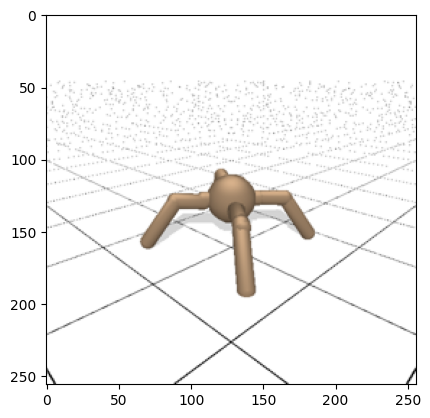

In [4]:
action = env.action_space.sample()
state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated
plt.imshow(env.render())
print(state)
print(reward)

In [ ]:
context_distributions = [
    NormalFloatContextFeature("goal_position_x", mu=9.8, sigma=1, upper=50, lower=0),
    NormalFloatContextFeature("goal_position_y", mu=9.8, sigma=1, upper=50, lower=0),
]
context_sampler = ContextSampler(
    context_distributions=context_distributions,
    context_space=CARLBraxPusher.get_context_space(),
    seed=seed,
)
contexts = context_sampler.sample_contexts(n_contexts=5)
print(contexts)
env = CARLBraxPusher(contexts=contexts)
env.reset()
print(f"Current context ID: {env.context_id}")
print(f"Current context: {env.context}")

{0: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'viscosity': 0.0, 'mass_r_shoulder_pan_link': 7.2935214, 'mass_r_shoulder_lift_link': 3.1415926536, 'mass_r_upper_arm_roll_link': 1.7140529, 'mass_r_elbow_flex_link': 0.40715042, 'mass_r_forearm_roll_link': 0.92818356, 'mass_r_wrist_flex_link': 0.0050265482, 'mass_r_wrist_roll_link': 0.18346901, 'mass_object': 0.0018325957, 'goal_position_x': 11.564052345967665, 'goal_position_y': 8.82272212012359, 'goal_position_z': 0.05}, 1: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'viscosity': 0.0, 'mass_r_shoulder_pan_link': 7.2935214, 'mass_r_shoulder_lift_link': 3.1415926536, 'mass_r_upper_arm_roll_link': 1.7140529, 'mass_r_elbow_flex_link': 0.40715042, 'mass_r_forearm_roll_link': 0.92818356, 'mass_r_wrist_flex_link': 0.0050265482, 'mass_r_wrist_roll_link': 0.18346901, 'mass_object': 0.0018325957, 'goal_position_x': 10.200157208367225, 'goal_position_y': 10.75008841752559, 'goal_posi

{'obs': Array([ 2.1816783e-03, -5.4491027e-03, -1.4676465e-02,  4.4397898e-03,
        1.4412638e-02,  7.3958342e-03, -2.8384138e-02,  5.3717576e-02,
       -1.7213297e-01, -3.7162882e-01, -5.3222454e-03,  5.9784693e-01,
       -2.5987495e-03, -8.9618409e-01,  8.2100075e-01, -6.0001338e-01,
        4.7048074e-05,  6.4647520e-01, -1.1481978e-01, -2.7500001e-01,
        4.4999999e-01, -5.0000001e-02, -3.2300001e-01], dtype=float32), 'context': {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'viscosity': 0.0, 'mass_r_shoulder_pan_link': 7.2935214, 'mass_r_shoulder_lift_link': 3.1415926536, 'mass_r_upper_arm_roll_link': 1.7140529, 'mass_r_elbow_flex_link': 0.40715042, 'mass_r_forearm_roll_link': 0.92818356, 'mass_r_wrist_flex_link': 0.0050265482, 'mass_r_wrist_roll_link': 0.18346901, 'mass_object': 0.0018325957, 'goal_position_x': 11.564052345967665, 'goal_position_y': 8.82272212012359, 'goal_position_z': 0.05}}
-0.73239356


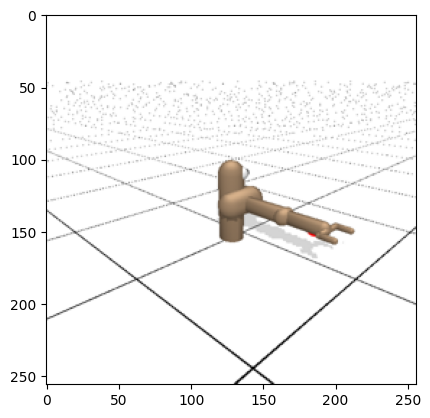

In [7]:
action = env.action_space.sample()
state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated
plt.imshow(env.render())
print(state)
print(reward)